In [2]:
import pandas as pd
import numpy as np
import math
%matplotlib inline


In [5]:
df = pd.read_csv("abalone.csv")

In [6]:
import matplotlib.pyplot as plt
import seaborn as  sns

In [5]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


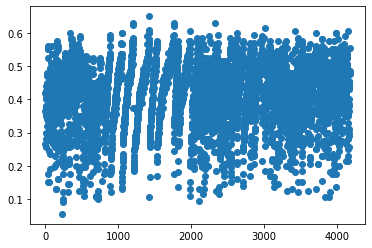

In [7]:
plt.scatter(df.index,df['Diameter'])
plt.show()

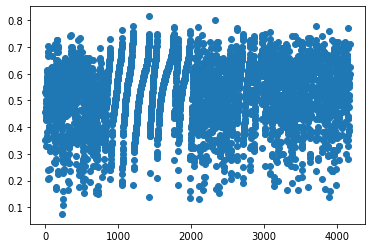

In [8]:
plt.scatter(df.index,df['Length'])
plt.show()

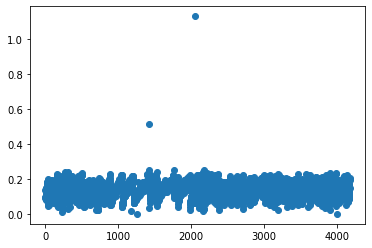

In [9]:
plt.scatter(df.index,df['Height'])
plt.show()

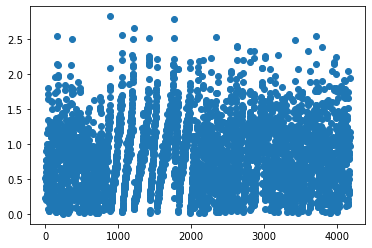

In [11]:
plt.scatter(df.index,df['Whole weight'])
plt.show()

# New Section

In [7]:
df[['Diameter','Length','Height','Whole weight']].corr()

,Diameter,Length,Height,Whole weight
Diameter,1.000000,0.986812,0.833684,0.925452
Length,0.986812,1.000000,0.827554,0.925261
Height,0.833684,0.827554,1.000000,0.819221
Whole weight,0.925452,0.925261,0.819221,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 20000.0)

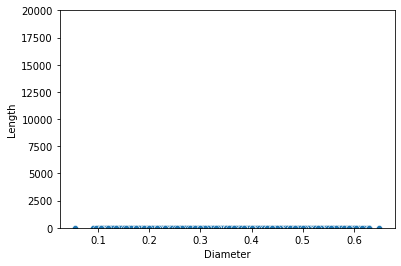

In [24]:
sns.scatterplot(df.Diameter,df.Length)
plt.ylim(0,20000)

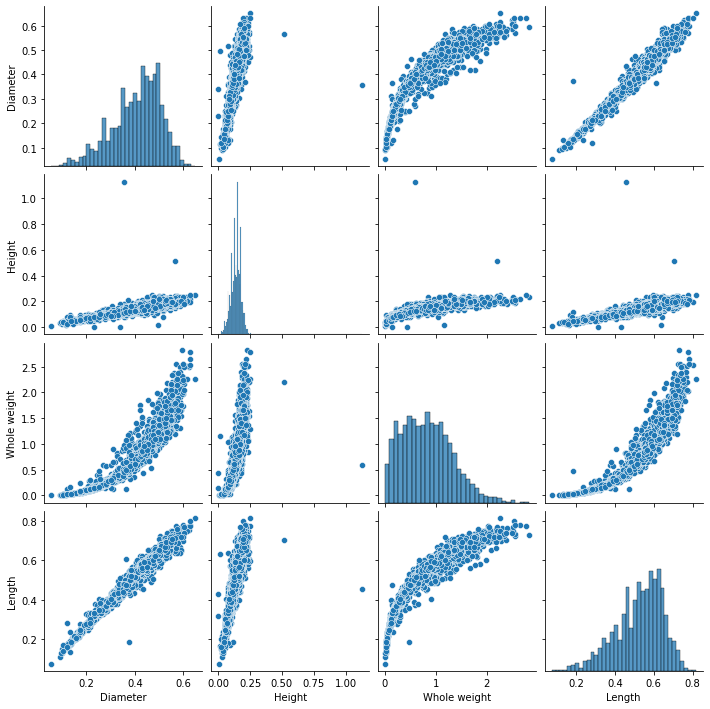

In [29]:
sns.pairplot(data=df[['Diameter','Height','Whole weight','Length','Sex']])

In [8]:
import statistics as st

In [9]:
df[['Diameter','Length','Height']].mean()

Diameter    0.407881
Length      0.523992
Height      0.139516
dtype: float64

In [36]:
df[['Diameter','Length','Height']].median()

Diameter    0.425
Length      0.545
Height      0.140
dtype: float64

In [37]:
df[['Diameter','Length','Height']].mode()

,Diameter,Length,Height
0,0.45,0.550,0.15
1,NaN,0.625,NaN


In [38]:
df[['Diameter','Length','Height']].describe(include='all')

,Diameter,Length,Height
count,4177.000000,4177.000000,4177.000000
mean,0.407881,0.523992,0.139516
std,0.099240,0.120093,0.041827
min,0.055000,0.075000,0.000000
25%,0.350000,0.450000,0.115000
50%,0.425000,0.545000,0.140000
75%,0.480000,0.615000,0.165000
max,0.650000,0.815000,1.130000


(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <a list of 10 Patch objects>)

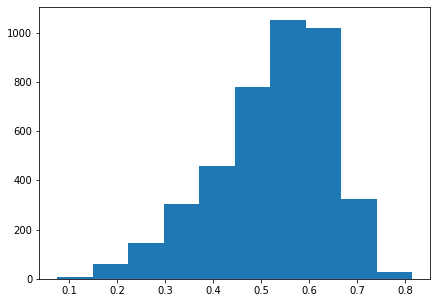

In [41]:
plt.figure(figsize=(7,5))
plt.hist(df.Length)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3d84192c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3d8410a210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3d8421a0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d84180910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d84180050>],
 'means': []}

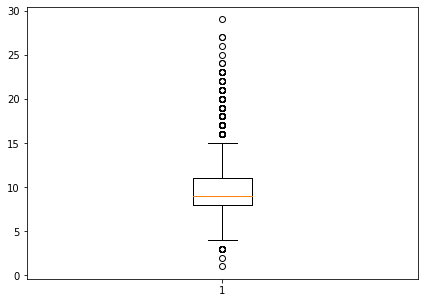

In [42]:
plt.figure(figsize=(7,5))
plt.boxplot(df.Rings)

In [43]:
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [44]:
print(df.count(0))

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64


In [45]:
print(df.shape)

(4177, 9)


In [46]:
X = df.iloc[:, :-1].values
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [47]:
Y = df.iloc[:, -1].values
print(Y)

[15  7  9 ...  9 10 12]


In [10]:

# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [16]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis=1, inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [22]:
#8. Split the data into dependent and independent variables
features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
X = df[features]
target ='age'


In [23]:
#10. Split the data into training and testing
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size =0.3,random_state =1)
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [25]:
model = RandomForestRegressor(random_state =1)

In [26]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [27]:
y_test = model.predict(X_test)
y_test

array([10.62, 10.43, 10.4 , ...,  9.95, 10.05,  7.18])

In [29]:
y_preds = model.predict(X_train)

In [30]:
#Evaluating the score of our model
import math

from sklearn.metrics import mean_absolute_error,r2_score
print(math.sqrt(mean_absolute_error(y_train,y_preds)))


0.7666500565912042
